<a href="https://colab.research.google.com/github/nucontreras/artificial-intelligence-scripts/blob/main/FSCN/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><FONT size="8" color='264653'>Audiographics Project: sonification for the accessibility of quantitative information in graphic format </FONT>

><b><FONT size="3" color='DimGray'> Sonification for the accessibility of quantitative information in graphic format is part of the research line in Technology and Care of the Millennium Institute for Care Research ([MICARE](https://www.micare.cl/)). The objective of this project is to implement a tool for the transformation of quantitative information presented in visual form into audio to facilitate access to visually handicapped people, using sonification techniques and image analysis through artificial intelligence. </FONT>

><b><FONT size="3" color='DimGray'> This file contains the data analysis of the project. </FONT>

# <b><FONT size="5" color='MidnightBlue '>Connection to Google Drive </FONT>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd 'gdrive/MyDrive/AudioGraphs'

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1BQNCMYEG1Xd_TAcD5txHIHbOaJiFKKWE/AudioGraphs


# <b><FONT size="5" color='MidnightBlue '>Import of packages </FONT>



In [2]:
import os
import sys
import numpy as np
from random import shuffle, seed

# Data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#<b><FONT color='MidnightBlue' size='5'>General Functions</FONT></b>

In [3]:
def search_imgs(path):
    """
    Function that receives a path and returns all the images of type jpg,
    jpeg or png found in that path as a list.
    Solves the problem of automatic synchronization of mac 'dot dash' files.

    Parameters
    ----------
    path : string
        Path to the files.

    Returns
    -------
    list
        List with the names of all images in 'path'.
    """
    extensions = ('.png', '.jpg', '.jpeg')
    # TODO: optimize complexity
    imgs_list_tmp = os.listdir(path)
    imgs_list = list()
    for file in imgs_list_tmp:
        if file.endswith(extensions):
           imgs_list.append(file)
    return imgs_list

In [4]:
def plot_table(frame, title=None):
    fig = plt.figure(figsize=(8, 1))
    ax = fig.add_subplot(111)

    ax.table(cellText = my_frame.values,
            rowLabels = my_frame.index,
            colLabels = my_frame.columns,
            loc = "center"
            )
    if title:
        ax.set_title(title)

    ax.axis("off")

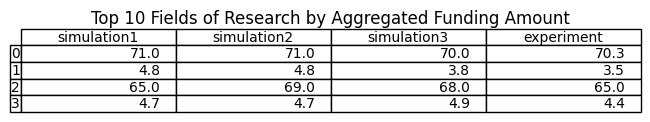

In [5]:
#testing plot_table

my_frame = pd.DataFrame(data={'simulation1':[71,4.8,65,4.7],
                              'simulation2':[71,4.8,69,4.7],
                              'simulation3':[70,3.8,68,4.9],
                              'experiment':[70.3,3.5,65,4.4]})
title = "Top 10 Fields of Research by Aggregated Funding Amount"
#my_frame Display pandas table
plot_table(my_frame, title= title)


In [27]:
def path_img_info(path):
    imgs_path = search_imgs(path)
    imgs_path_extension_set = set([img_name.split(".")[-1] for img_name in imgs_path])
    if imgs_path:
        text = f"The path '{path}' have {len(imgs_path)} of {', '.join(set(imgs_path_extension_set))} extension."
        print(text)

# <b><FONT size="6" color='MidnightBlue '>Old Database </FONT>


## <b><FONT size="5" color='MidnightBlue '>Paths to datasets </FONT>

### <b><FONT size="4" color='619b8a'>Path to bar chart images old dataset  </FONT>

In [23]:
path_bar_ex_internet_good_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/buenos'
path_bar_ex_internet_bad_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/malos'
path_bar_ex_internet_regular_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/regulares'

path_bar_ex_python_good_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/buenos'
path_bar_ex_python_bad_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/malos'
path_bar_ex_python_regular_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/regulares'

path_bar_internet_old_db = 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet'
path_bar_internet_vertical_old_db = 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/Barras Verticales'
path_bar_internet_0_originales_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/0_originales'
path_bar_internet_1_grayscale_reshape_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/1_grayscale_reshape'
path_bar_internet_2_output_red_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/2_output_red'
path_bar_internet_3_threshold_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/3_threshold'
path_bar_internet_4_contornos_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/4_contornos'
path_bar_internet_5_contornos_sobre_original_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/5_contornos_sobre_original'

path_bar_segm_2_train_binarias_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/binarias'
path_bar_segm_2_train_color_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/color'
path_bar_segm_2_train_grises_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/grises'
path_bar_segm_2_train_segmented_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/segmented'

path_bar_segm_2_test_binarias_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/binarias'
path_bar_segm_2_test_color_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/color'
path_bar_segm_2_test_grises_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/grises'
path_bar_segm_2_test_segmented_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/segmented'
path_bar_segm_2_test_output_1_grayscale_reshape_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/1_grayscale_reshape'
path_bar_segm_2_test_output_2_output_red_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/2_output_red'
path_bar_segm_2_test_output_3_threshold_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/3_threshold'
path_bar_segm_2_test_output_4_contornos_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/4_contornos'
path_bar_segm_2_test_output_5_contornos_sobre_original_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/5_contornos_sobre_original'

### <b><FONT size="4" color='619b8a'>Path to line chart images old dataset  </FONT>

In [24]:
path_line_matlab_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/out'
path_line_matlab_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/out_onepixel'
path_line_matlab_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/pred'
path_line_matlab_test_graficosfull_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-full'
path_line_matlab_test_graficossolo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-solo'

path_line_python_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/out'
path_line_python_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/out_onepixel'
path_line_python_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/pred'
path_line_python_test_graficos_full_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/test/graficos-full'
path_line_python_test_graficos_solo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/test/graficos-solo'

path_line_realnew_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/out'
path_line_realnew_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/out_onepixel'
path_line_realnew_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/pred'
path_line_realnew_test_graficos_full_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/test/graficos-full'
path_line_realnew_test_graficos_solo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/test/graficos-solo'

## <b><FONT size="5" color='MidnightBlue '>Amount of data </FONT>

In [29]:
path_img_info(path_bar_ex_internet_good_old_db)
path_img_info(path_bar_ex_internet_bad_old_db)
path_img_info(path_bar_ex_internet_regular_old_db)

path_img_info(path_bar_ex_python_good_old_db)
path_img_info(path_bar_ex_python_bad_old_db)
path_img_info(path_bar_ex_python_regular_old_db)

path_img_info(path_bar_internet_old_db)
path_img_info(path_bar_internet_vertical_old_db)
path_img_info(path_bar_internet_0_originales_old_db)
path_img_info(path_bar_internet_1_grayscale_reshape_old_db)
path_img_info(path_bar_internet_2_output_red_old_db)
path_img_info(path_bar_internet_3_threshold_old_db)
path_img_info(path_bar_internet_4_contornos_old_db)
path_img_info(path_bar_internet_5_contornos_sobre_original_old_db)

path_img_info(path_bar_segm_2_train_binarias_old_db)
path_img_info(path_bar_segm_2_train_color_old_db)
path_img_info(path_bar_segm_2_train_grises_old_db)
path_img_info(path_bar_segm_2_train_segmented_old_db)

path_img_info(path_bar_segm_2_test_binarias_old_db)
path_img_info(path_bar_segm_2_test_color_old_db)
path_img_info(path_bar_segm_2_test_grises_old_db)
path_img_info(path_bar_segm_2_test_segmented_old_db)
path_img_info(path_bar_segm_2_test_output_1_grayscale_reshape_old_db)
path_img_info(path_bar_segm_2_test_output_2_output_red_old_db)
path_img_info(path_bar_segm_2_test_output_3_threshold_old_db)
path_img_info(path_bar_segm_2_test_output_4_contornos_old_db)
path_img_info(path_bar_segm_2_test_output_5_contornos_sobre_original_old_db)

The path 'Codigos y BD anteriores/Barras/ejemplos/internet/buenos' have 22 of jpg extension.
The path 'Codigos y BD anteriores/Barras/ejemplos/internet/malos' have 14 of jpg extension.
The path 'Codigos y BD anteriores/Barras/ejemplos/internet/regulares' have 6 of jpg extension.
The path 'Codigos y BD anteriores/Barras/ejemplos/python/buenos' have 13 of png extension.
The path 'Codigos y BD anteriores/Barras/ejemplos/python/malos' have 13 of png extension.
The path 'Codigos y BD anteriores/Barras/ejemplos/python/regulares' have 6 of png extension.
The path 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet' have 544 of jpg, png extension.
The path 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/Barras Verticales' have 42 of jpg extension.
The path 'Codigos y BD anteriores/Barras/models/dataset/internet/0_originales' have 544 of jpg extension.
The path 'Codigos y BD anteriores/Barras/models/dataset/internet/1_grayscale_reshape' have 544 of jpg extens

In [ ]:
# pandas example


d = {
    'Algothime': ['KNN', 'SVM', 'MLP'],
    'Param. 1': ['-', '-', '-'],
    'Param. 2': ['-', '-', '-'],
    'Plage param. 1': ['-', '-', '-'],
    'Plage param. 2': ['-', '-', '-'],
}
df = pd.DataFrame(data=d)
df

,Algothime,Param. 1,Param. 2,Plage param. 1,Plage param. 2
0,KNN,-,-,-,-
1,SVM,-,-,-,-
2,MLP,-,-,-,-


In [ ]:
data = {'product_name': ['laptop', 'printer', 'tablet', 'desk', 'chair'],
        'price': [1200, 150, 300, 450, 200]
        }

df = pd.DataFrame(data, index=['product_1', 'product_2', 'product_3', 'product_4', 'product_5'])

df.style.set_table_attributes("style='display:inline'").set_caption('Caption table')
df

,product_name,price
product_1,laptop,1200
product_2,printer,150
product_3,tablet,300
product_4,desk,450
product_5,chair,200


# <b><FONT size="6" color='MidnightBlue '>New Database </FONT>


## <b><FONT size="5" color='MidnightBlue '>Paths to datasets </FONT>

### <b><FONT size="4" color='619b8a'>Path to bar chart images new dataset  </FONT>

In [ ]:
path_bar_aug_new_db = 'Data Base/Augmented/bar_chart'
path_bar_orig_new_db = 'Data Base/Originales/original_images_bar_chart'
path_bar_cut_h_new_db = 'Data Base/Recortadas/h_bar_chart'
path_bar_cut_v_new_db = 'Data Base/Recortadas/v_bar_chart'

### <b><FONT size="4" color='619b8a'>Path to line chart images new dataset  </FONT>

In [ ]:
path_line_aug_new_db = 'Data Base/Augmented/line_chart'
path_line_orig_new_db = 'Data Base/Originales/original_images_line_chart'
path_line_cut_new_db = 'Data Base/Recortadas/line_chart'

### <b><FONT size="4" color='619b8a'>Path to pie chart images new dataset  </FONT>

In [ ]:
path_pie_aug_new_db = 'Data Base/Augmented/pie_chart'
path_pie_orig_new_db = 'Data Base/Originales/original_images_pie_chart'
path_pie_cut_new_db = 'Data Base/Recortadas/pie_chart'

## <b><FONT size="5" color='MidnightBlue '>Amount of data </FONT>